# Problem: Predictive loan model for an applicant

## Objective:

Predict the risk of a loan being default based on the past loan data, for a given loan applicant

Dataset:
 https://drive.google.com/drive/folders/1XCKR-Gdw9yziWWW6TVvx5wvArFkP96PP 

 Dataset will be provided in parts

Prep work required:

Data for 3 quarters will be provided to the students, with a select subset of features. This will be used for prep work and initial baselining.

 Identification of the performance parameters to be improved, for the given problem statement

 Baseline performance figures for 5 different ML classifiers, after minimal data pre-processing, Baseline figures must include (i) accuracy (ii) classification report (iii) confusion matrix (iv) ROC-AUC and AUPRC scores. One of the classifiers must be ANN.

 Observations from exploratory analysis of the dataset

 Outline of feature engineering techniques that may be used to improve the classifier
performance

# Performance

Session 1:

The complete dataset (with data for 2 more years and all features) will be provided.
 Shortlist 3 best performing classifiers, from the prep work
 Apply relevant feature engineering techniques on the dataset provided
 Compare the performance of the 3 classifiers with the baseline performance figured obtained
during prep-work
 Note down the features that figure high in feature ranking

Session 2:
 Apply ensemble techniques to observe their impact on the performance of the classifiers 

Session 3:
 Group presentation

# DataSet Description:

In [1]:
import os
import pandas as pd
def read_csv_data(dir_name):
    '''
    Arg: Directory Name
    Return: List of CSV files from a directory'''
    list_of_files=os.listdir(dir_name)
    return [file for file in list_of_files if file.endswith(".csv")]

def read_list_csv_to_pandas(list_of_csv_files):
    '''
    Arg: List of csv files name
    Return: Pandas dataframe with all file
    Assumption: ALl the files have same format'''
    pandas_list=[]
    for file in list_of_csv_files:
        pandas_list.append(pd.read_csv(os.path.join(utils['raw_data_path'],file),skiprows=1,parse_dates=['issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d','hardship_start_date','hardship_end_date','payment_plan_start_date','debt_settlement_flag_date','settlement_date','earliest_cr_line']))
    merged_file=pd.concat(pandas_list)
    return merged_file

#After analysis we found that some are date column

In [2]:
DATA_PATH='/Users/mghosh2/Downloads/loan_data/'

utils={
    'raw_data_path':DATA_PATH
}

In [83]:
list_of_files=read_csv_data(utils['raw_data_path'])
list_of_files

['LoanStats_securev1_2017Q1.csv',
 'LoanStats_securev1_2017Q2.csv',
 'LoanStats_securev1_2017Q3.csv']

In [4]:
!head -n 5 /Users/mghosh2/Downloads/loan_data/LoanStats_securev1_2017Q1.csv
## It looks like first row is not useful

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","fico_range_low","fico_range_high","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","last_fico_range_high","last_fico_range_low","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_join

In [84]:
data_raw = read_list_csv_to_pandas(list_of_files)
data_raw.head()

/Users/mghosh2/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3209: DtypeWarning: Columns (0,118,146) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/mghosh2/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3209: DtypeWarning: Columns (0,146) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/mghosh2/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3209: DtypeWarning: Columns (0,129,130,131,139,146) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,104046719,NaN,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
1,104048967,NaN,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
2,104028593,NaN,4600.0,4600.0,4600.0,36 months,11.39%,151.45,B,B3,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
3,104046702,NaN,14000.0,14000.0,14000.0,60 months,12.74%,316.69,C,C1,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
4,104280113,NaN,15000.0,15000.0,15000.0,36 months,5.32%,451.73,A,A1,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN


In [6]:
", ".join(list(data_raw.columns))

'id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, fico_range_low, fico_range_high, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, last_fico_range_high, last_fico_range_low, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util,

In [7]:
data_raw.dtypes

id                               object
member_id                       float64
loan_amnt                       float64
funded_amnt                     float64
funded_amnt_inv                 float64
                              ...      
settlement_status                object
settlement_date          datetime64[ns]
settlement_amount               float64
settlement_percentage           float64
settlement_term                 float64
Length: 151, dtype: object

In [8]:
len(list(data_raw.columns))

151

In [86]:
data_raw['loan_status'].value_counts()

Current               285047
Fully Paid             27576
Late (31-120 days)      5044
Charged Off             3036
In Grace Period         2661
Late (16-30 days)       1564
Default                    3
Name: loan_status, dtype: int64

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 14,6

In [87]:
def colume_details(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values 
    summary['Non_Missing'] = df.shape[0] - summary['Missing']
    summary['Percent_Missing'] = summary['Missing']/df.shape[0]
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [88]:
data_raw=data_raw.reset_index().drop(['index'],axis=1)
pd.set_option('display.max_rows', 152)
column_explantion=colume_details(data_raw)
column_explantion[column_explantion['dtypes']=='object']

Dataset Shape: (324937, 151)


,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,object,0,324937,0.000000,324937,104046719,104048967,104028593,18.31
5,term,object,6,324931,0.000018,2,36 months,36 months,36 months,0.84
6,int_rate,object,6,324931,0.000018,65,15.99%,25.49%,11.39%,5.43
8,grade,object,6,324931,0.000018,7,C,E,B,2.21
9,sub_grade,object,6,324931,0.000018,35,C5,E4,B3,4.51
10,emp_title,object,22481,302456,0.069186,95032,Project Leader,Pilot,cable technician,13.44
11,emp_length,object,22155,302782,0.068182,11,10+ years,10+ years,4 years,3.01
12,home_ownership,object,6,324931,0.000018,5,MORTGAGE,MORTGAGE,RENT,1.40
14,verification_status,object,6,324931,0.000018,3,Source Verified,Source Verified,Not Verified,1.57
16,loan_status,object,6,324931,0.000018,7,Current,Current,Current,0.72


In [13]:
column_explantion[column_explantion['dtypes']!='object']

,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
1,member_id,float64,324937,0,1.000000,0,NaN,NaN,NaN,0.00
2,loan_amnt,float64,6,324931,0.000018,1549,14000,5000,4600,6.58
3,funded_amnt,float64,6,324931,0.000018,1549,14000,5000,4600,6.58
4,funded_amnt_inv,float64,6,324931,0.000018,1551,14000,5000,4600,6.73
7,installment,float64,6,324931,0.000018,30173,492.13,200.1,151.45,12.10
13,annual_inc,float64,6,324931,0.000018,22133,82000,215000,44470,8.19
15,issue_d,datetime64[ns],6,324931,0.000018,9,2017-03-01 00:00:00,2017-03-01 00:00:00,2017-03-01 00:00:00,3.16
19,desc,float64,324937,0,1.000000,0,NaN,NaN,NaN,0.00
24,dti,float64,298,324639,0.000917,6972,31.07,6.06,13.43,11.76
25,delinq_2yrs,float64,6,324931,0.000018,26,0,0,0,1.08


In [14]:
date_columns=[x  for x in list(data_raw.columns) if x.endswith('d') or x.endswith('date')]
date_columns
## Not all are date columns so just an approximation

['id',
 'member_id',
 'issue_d',
 'mths_since_last_record',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'num_accts_ever_120_pd',
 'num_tl_30dpd',
 'sec_app_collections_12_mths_ex_med',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_dpd',
 'disbursement_method',
 'debt_settlement_flag_date',
 'settlement_date']

In [89]:
column_explantion[column_explantion['dtypes']=='datetime64[ns]']
##Columns with high null values (more than ratio 0.999) are rejected
# We have to work with  'issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d' this date columns

,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
15,issue_d,datetime64[ns],6,324931,0.000018,9,2017-03-01 00:00:00,2017-03-01 00:00:00,2017-03-01 00:00:00,3.16
26,earliest_cr_line,datetime64[ns],6,324931,0.000018,666,1996-05-01 00:00:00,2004-01-01 00:00:00,2003-12-01 00:00:00,8.40
47,last_pymnt_d,datetime64[ns],437,324500,0.001345,12,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,0.99
49,next_pymnt_d,datetime64[ns],30618,294319,0.094227,3,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,0.00
50,last_credit_pull_d,datetime64[ns],10,324927,0.000031,13,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,0.79
134,hardship_start_date,datetime64[ns],324186,751,0.997689,5,NaT,NaT,NaT,1.27
135,hardship_end_date,datetime64[ns],324186,751,0.997689,7,NaT,NaT,NaT,1.88
136,payment_plan_start_date,datetime64[ns],324186,751,0.997689,6,NaT,NaT,NaT,1.71
145,debt_settlement_flag_date,datetime64[ns],324794,143,0.999560,6,NaT,NaT,NaT,2.19
147,settlement_date,datetime64[ns],324794,143,0.999560,7,NaT,NaT,NaT,2.33


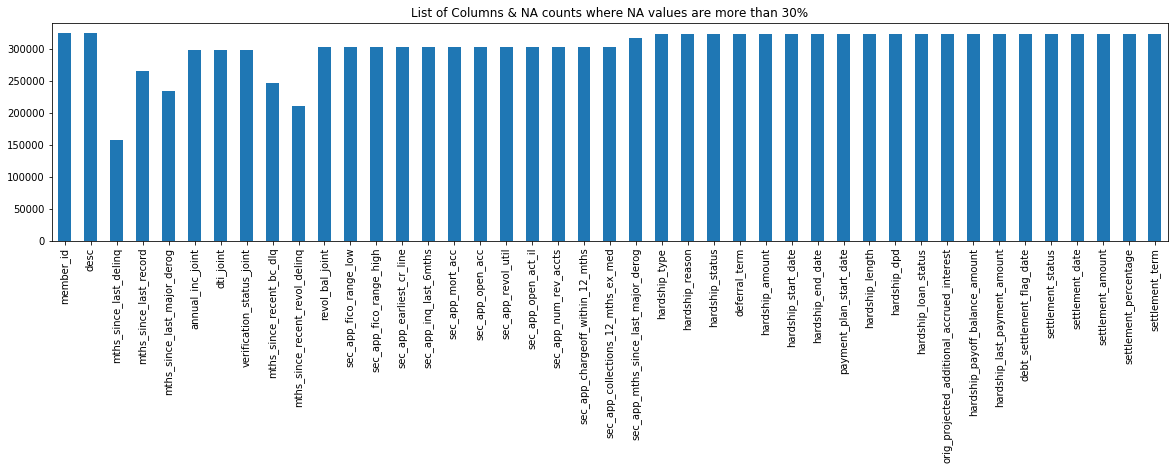

In [16]:
NA_col = data_raw.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(data_raw))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

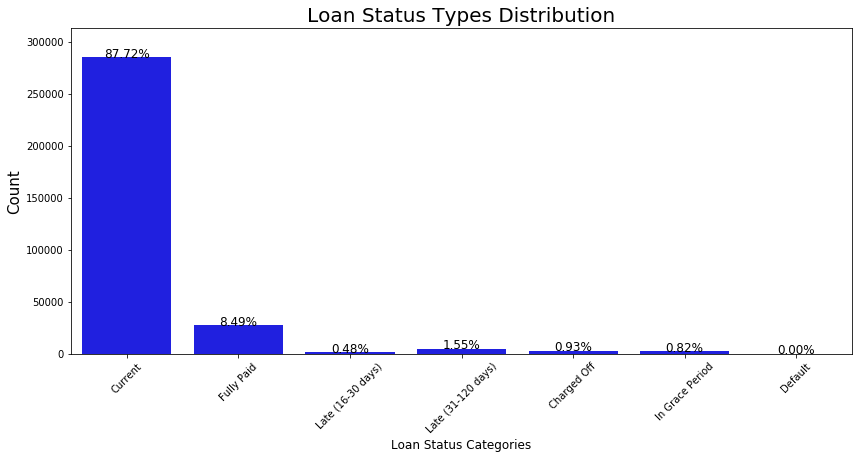

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

total = len(data_raw)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=data_raw, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

# From the figure and as explained by mam "Current is Non Risky and Rest are Risky"

#Recently mam said "Current and Fully Paid are Non Risky and the rest are Risky"

In [90]:
# We have to clean some columns like interest rate etc
import re
def int_rate_pick(text):
    text=str(text).strip()
    try:
        if len(text) >0:
            int_rate=re.compile(r'\d+(\.\d{1,2})?')
            int_rate=int_rate.search(text)[0]
            return float(int_rate)
        else:
            return 0
    except:
        return 0
    
##Looking at the data it looks 2018-01 last quarter. So we consider epoc 2018-02 when we have the data and doing analysis
from datetime import datetime

def date_diff(col_value_provided,today=datetime(2018,2,1,0,0,0)):
    diff = today-col_value_provided
    return diff.days
int_rate_pick('nan' )
# date_diff(datetime(2018,1,1,0,0,0))

0

In [91]:
#columns with maximum Blank. 5 are printed
blank_columns=list(column_explantion[column_explantion['Percent_Missing'] > 0.99]['Name'].values)
blank_columns

['member_id',
 'desc',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

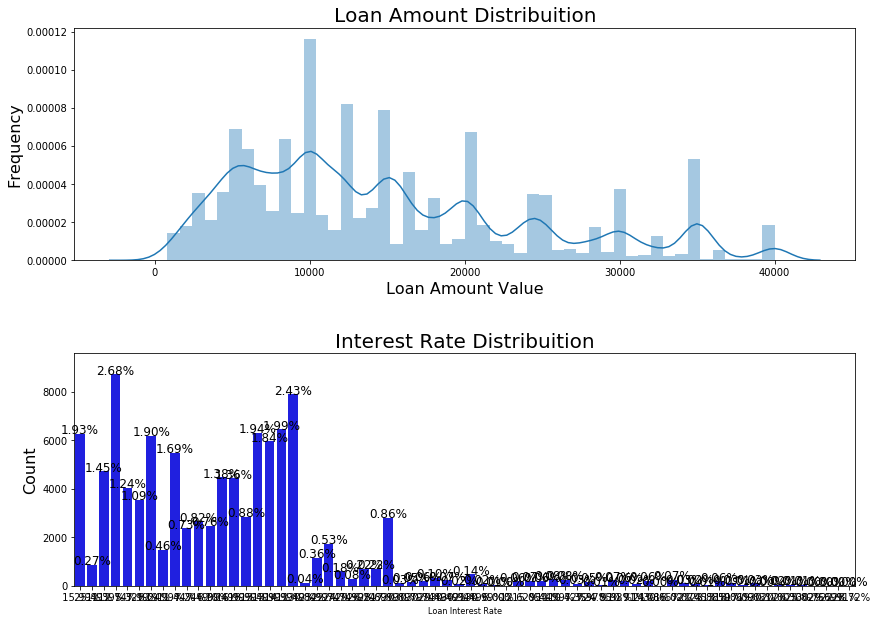

In [14]:
#Loan Amount and Interest Rate distribution

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(data_raw[:100000].fillna(0)["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_rate", data=data_raw.fillna(0)[:100000], 
                  color='blue')
g1.set_xlabel("Loan Interest Rate", fontsize=8)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

In [92]:
# importtant date column for feature creation. 'issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d'
# Drop columns to reduce the data size
data_raw=data_raw.drop(blank_columns,axis=1)

data_raw['int_rate_float']=data_raw['int_rate'].apply(int_rate_pick)
data_raw['revol_util_float']=data_raw['revol_util'].apply(int_rate_pick)
data_raw['days_since_issue']=data_raw['issue_d'].apply(date_diff)
data_raw['days_since_last_payment']=data_raw['last_pymnt_d'].apply(date_diff)
data_raw['days_since_next_payment']=data_raw['next_pymnt_d'].apply(date_diff)
data_raw['days_since_last_credit_pull']=data_raw['last_credit_pull_d'].apply(date_diff)
data_raw['years_since_credit_line']=data_raw['earliest_cr_line'].apply(date_diff).apply(lambda x: x/365)

data_raw.drop(['last_pymnt_d','next_pymnt_d','last_credit_pull_d','int_rate','revol_util','earliest_cr_line'],axis=1)
data_raw.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_flag,disbursement_method,debt_settlement_flag,int_rate_float,revol_util_float,days_since_issue,days_since_last_payment,days_since_next_payment,days_since_last_credit_pull,years_since_credit_line
0,104046719,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,Project Leader,...,N,Cash,N,15.99,63.2,337.0,62.0,31.0,62.0,21.769863
1,104048967,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,Pilot,...,N,Cash,N,25.49,18.8,337.0,62.0,31.0,62.0,14.095890
2,104028593,4600.0,4600.0,4600.0,36 months,11.39%,151.45,B,B3,cable technician,...,N,Cash,N,11.39,19.1,337.0,62.0,31.0,62.0,14.180822
3,104046702,14000.0,14000.0,14000.0,60 months,12.74%,316.69,C,C1,Specialty Sales,...,N,Cash,N,12.74,46.2,337.0,62.0,31.0,62.0,44.030137
4,104280113,15000.0,15000.0,15000.0,36 months,5.32%,451.73,A,A1,Executive Account Manager,...,N,Cash,N,5.32,33.7,337.0,62.0,31.0,62.0,43.282192


In [81]:
data_raw.shape

(324937, 136)

In [16]:
y = data_raw['loan_status'].copy()
y = y.isin(['Late (31-120 days)','Charged Off','In Grace Period','Late (16-30 days)','Default']).astype('int')
y.value_counts()

0    312629
1     12308
Name: loan_status, dtype: int64

In [93]:
y.value_counts()/y.shape[0]

# Only 4% are risky

0    0.962122
1    0.037878
Name: loan_status, dtype: float64

In [18]:
## 'emp_title' and 'url' are high cardinality. We will ignore url column

data_raw['emp_length'][:100000].value_counts(normalize=True) * 100

10+ years    37.030785
2 years      10.076236
3 years       9.086999
< 1 year      7.802067
1 year        7.120354
5 years       6.706380
4 years       6.393480
6 years       4.694573
9 years       3.965549
7 years       3.587058
8 years       3.536521
Name: emp_length, dtype: float64

In [94]:
data_raw['emp_title'][:100000].value_counts(normalize=True) * 100

#Not any useful column

Teacher                            2.010829
Manager                            1.798766
Owner                              1.546874
Driver                             0.841793
Registered Nurse                   0.814881
                                     ...   
violinist                          0.001076
Sol proprietor                     0.001076
CDL driver/sales representative    0.001076
Resident Monitor                   0.001076
CPA- accountant                    0.001076
Name: emp_title, Length: 36487, dtype: float64

In [95]:
# data_raw=data_raw.reset_index().drop(['index'],axis=1)
pd.set_option('display.max_rows', 152)
column_explantion2=colume_details(data_raw)
column_explantion2[column_explantion2['dtypes']=='object']

Dataset Shape: (324937, 136)


,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,object,0,324937,0.000000,324937,104046719,104048967,104028593,18.31
4,term,object,6,324931,0.000018,2,36 months,36 months,36 months,0.84
5,int_rate,object,6,324931,0.000018,65,15.99%,25.49%,11.39%,5.43
7,grade,object,6,324931,0.000018,7,C,E,B,2.21
8,sub_grade,object,6,324931,0.000018,35,C5,E4,B3,4.51
9,emp_title,object,22481,302456,0.069186,95032,Project Leader,Pilot,cable technician,13.44
10,emp_length,object,22155,302782,0.068182,11,10+ years,10+ years,4 years,3.01
11,home_ownership,object,6,324931,0.000018,5,MORTGAGE,MORTGAGE,RENT,1.40
13,verification_status,object,6,324931,0.000018,3,Source Verified,Source Verified,Not Verified,1.57
15,loan_status,object,6,324931,0.000018,7,Current,Current,Current,0.72


In [96]:
column_explantion2[column_explantion2['dtypes']!='object']

,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
1,loan_amnt,float64,6,324931,0.000018,1549,14000,5000,4600,6.58
2,funded_amnt,float64,6,324931,0.000018,1549,14000,5000,4600,6.58
3,funded_amnt_inv,float64,6,324931,0.000018,1551,14000,5000,4600,6.73
6,installment,float64,6,324931,0.000018,30173,492.13,200.1,151.45,12.10
12,annual_inc,float64,6,324931,0.000018,22133,82000,215000,44470,8.19
14,issue_d,datetime64[ns],6,324931,0.000018,9,2017-03-01 00:00:00,2017-03-01 00:00:00,2017-03-01 00:00:00,3.16
22,dti,float64,298,324639,0.000917,6972,31.07,6.06,13.43,11.76
23,delinq_2yrs,float64,6,324931,0.000018,26,0,0,0,1.08
24,earliest_cr_line,datetime64[ns],6,324931,0.000018,666,1996-05-01 00:00:00,2004-01-01 00:00:00,2003-12-01 00:00:00,8.40
25,fico_range_low,float64,6,324931,0.000018,38,725,765,770,4.43


In [100]:
categorical_features=list(column_explantion2[column_explantion2['dtypes']=='object']['Name'].values)
categorical_features=[x for x in categorical_features if x not in ['id','url','emp_title','loan_status']]
categorical_features,len(categorical_features)

(['term',
  'int_rate',
  'grade',
  'sub_grade',
  'emp_length',
  'home_ownership',
  'verification_status',
  'pymnt_plan',
  'purpose',
  'title',
  'zip_code',
  'addr_state',
  'revol_util',
  'initial_list_status',
  'application_type',
  'verification_status_joint',
  'sec_app_earliest_cr_line',
  'hardship_flag',
  'disbursement_method',
  'debt_settlement_flag'],
 20)

In [99]:
numerical_features=list(column_explantion2[column_explantion2['dtypes']=='float64']['Name'].values)
numerical_features[:5],len(numerical_features)

(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc'],
 107)

In [27]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

numeric_features = numerical_features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = categorical_features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l1',solver='saga'))])
#                         ('classifier', LogisticRegression(penalty='l2',solver='lbfgs'))])

X=data_raw.drop(['loan_status'],axis=1)
y = data_raw['loan_status'].copy()
y = y.isin(['Late (31-120 days)','Charged Off','In Grace Period','Late (16-30 days)','Default']).astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test)) ##0.981

/Users/mghosh2/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


model score: 0.976


In [28]:
import pickle
with open("logisic_model_pipeline_l1.mod","wb") as f:
    pickle.dump(clf,f)

In [29]:
clf._final_estimator

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
from sklearn.feature_selection import SelectFromModel
preprocessor_new = preprocessor.fit(X_train)
X_train_new=preprocessor_new.transform(X_train)
X_train_new.shape

(259949, 2886)

In [36]:
logistic_clf_l1=LogisticRegression(penalty='l1',solver='saga')
logistic_clf_l1.fit(X_train_new, y_train)
print("model score test: %.3f" % logistic_clf_l1.score(preprocessor_new.transform(X_test), y_test))
print("model score train: %.3f" % logistic_clf_l1.score(X_train_new, y_train))

model score test: 0.976
model score train: 0.977


In [37]:
model = SelectFromModel(logistic_clf_l1, prefit=True)
X_new = model.transform(X_train_new)
X_new.shape

#1701 features are kept(out of 2886) but this is esoteric and thus explainability will be a challenge

(259949, 1701)

In [38]:
#Now we will balance data and do modeling again  SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
smote =SMOTE('minority')

X_sm,Y_sm=smote.fit_sample(X_new,y_train)


Using TensorFlow backend.


In [43]:
Y_sm.value_counts()/Y_sm.shape[0]

1    0.5
0    0.5
Name: loan_status, dtype: float64

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 15, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 300, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 9, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [55]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_sm, Y_sm)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.7min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [56]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': True}

In [59]:
rf_best=RandomForestClassifier(**rf_random.best_params_)
rf_best.fit(X_sm,Y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
X_test_new = model.transform(preprocessor_new.transform(X_test))
print("model score test: %.3f" % rf_best.score(X_test_new, y_test))

model score test: 0.973


In [63]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(rf_best.predict(X_test_new),y_test)

0.8153280138420497

In [80]:
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,auc
y_pred=rf_best.predict(X_test_new)
print("precesion : %.3f" %precision_score(y_pred,y_test))
print("recall : %.3f" %recall_score(y_pred,y_test))
print("f1_score : %.3f" %f1_score(y_pred,y_test))
print("classification matrix " , classification_report(y_pred,y_test))

precesion : 0.631
recall : 0.645
f1_score : 0.638
classification matrix                precision    recall  f1-score   support

           0       0.99      0.99      0.99     62587
           1       0.63      0.65      0.64      2401

    accuracy                           0.97     64988
   macro avg       0.81      0.82      0.81     64988
weighted avg       0.97      0.97      0.97     64988



(0, 1)

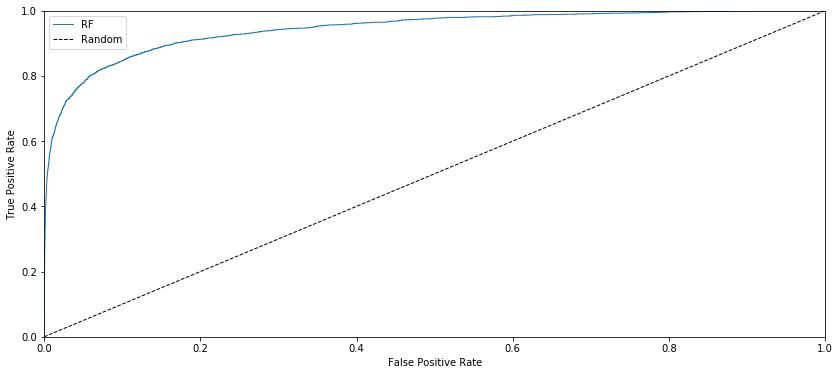

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

tp_unbalset, fp_unbalset ,threshold_unbalset= roc_curve(y_test, rf_best.predict_proba(X_test_new)[:,1])

plt.plot( tp_unbalset,fp_unbalset, lw=1)

plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.legend(['RF','Random'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X[numerical_features].fillna(0).values, i) for i in range(X[numerical_features].fillna(0).shape[1])]
vif["features"] = numerical_features

/Users/mghosh2/miniconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [35]:
vif.sort_values(by='VIF Factor',ascending=False).head(20)

,VIF Factor,features
0,inf,loan_amnt
1,inf,funded_amnt
18,5.492195e+13,total_pymnt
20,4.208972e+13,total_rec_prncp
21,2.519496e+12,total_rec_int
23,2.654923e+10,recoveries
8,2.648717e+09,fico_range_high
7,2.618858e+09,fico_range_low
2,2.886340e+07,funded_amnt_inv
22,2.608083e+07,total_rec_late_fee


In [36]:
X[numerical_features].fillna(0).corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,int_rate_float,revol_util_float,days_since_issue,days_since_last_payment,days_since_next_payment,days_since_last_credit_pull,years_since_credit_line
loan_amnt,1.000000,1.000000,0.999995,0.948082,0.105531,0.052071,-0.004492,0.089682,0.089681,-0.018275,...,0.005485,0.007773,0.058113,0.134635,0.121504,0.007877,-0.014063,0.020877,0.075738,0.156001
funded_amnt,1.000000,1.000000,0.999995,0.948082,0.105531,0.052071,-0.004492,0.089682,0.089681,-0.018275,...,0.005485,0.007773,0.058113,0.134635,0.121504,0.007877,-0.014063,0.020877,0.075738,0.156001
funded_amnt_inv,0.999995,0.999995,1.000000,0.947960,0.105529,0.052055,-0.004539,0.089741,0.089741,-0.018326,...,0.005486,0.007767,0.058106,0.134742,0.121507,0.007843,-0.014070,0.020881,0.075735,0.155996
installment,0.948082,0.948082,0.947960,1.000000,0.097824,0.054453,0.001489,0.032433,0.032435,0.009640,...,0.005806,0.008965,0.048932,0.187454,0.138542,0.020153,0.004490,0.002513,0.065484,0.131570
annual_inc,0.105531,0.105531,0.105529,0.097824,1.000000,-0.039325,0.010335,0.019056,0.019056,0.012782,...,-0.003473,-0.006691,-0.014201,-0.028832,0.016012,0.006158,0.001471,-0.002135,-0.010397,0.048791
dti,0.052071,0.052071,0.052055,0.054453,-0.039325,1.000000,-0.009622,-0.025244,-0.025243,-0.004926,...,0.018291,0.048810,0.112977,0.101027,0.107422,-0.025745,-0.017701,0.022919,0.084011,0.029123
delinq_2yrs,-0.004492,-0.004492,-0.004539,0.001489,0.010335,-0.009622,1.000000,-0.181297,-0.181285,0.021602,...,0.004163,0.004710,-0.001305,0.034082,-0.002878,-0.000156,-0.009844,0.012566,-0.017132,0.076354
fico_range_low,0.089682,0.089682,0.089741,0.032433,0.019056,-0.025244,-0.181297,1.000000,1.000000,-0.082556,...,0.006828,0.004129,0.000531,-0.397514,-0.477512,-0.041628,0.000987,-0.013603,0.077127,0.112500
fico_range_high,0.089681,0.089681,0.089741,0.032435,0.019056,-0.025243,-0.181285,1.000000,1.000000,-0.082551,...,0.006827,0.004130,0.000536,-0.397484,-0.477483,-0.041619,0.000992,-0.013596,0.077132,0.112505
inq_last_6mths,-0.018275,-0.018275,-0.018326,0.009640,0.012782,-0.004926,0.021602,-0.082556,-0.082551,1.000000,...,-0.000833,-0.000626,-0.006994,0.192895,-0.108160,-0.002061,0.050159,-0.049080,-0.007225,0.005930


In [37]:
#Actually Loan amount and funded amount are same column and they are related with 'funded_amnt_inv' as thats why so high VIF
## Such is hugh VIF. We shall pick numerical features with VIF less than 3
vif[vif['VIF Factor']<3.1].sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
6,3.087515,delinq_2yrs
63,2.912022,mths_since_recent_bc_dlq
5,2.835797,dti
62,2.741290,mths_since_recent_bc
64,2.671229,mths_since_recent_inq
40,2.594679,mths_since_rcnt_il
9,2.371318,inq_last_6mths
48,2.348376,inq_fi
29,2.335556,mths_since_last_major_derog
66,2.294937,num_accts_ever_120_pd


In [38]:
#Random Forest to figure out top categorical predictors
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

class LabelEncoderByCol(BaseEstimator, TransformerMixin):
    def __init__(self,col):
        #List of column names in the DataFrame that should be encoded
        self.col = col
        #Dictionary storing a LabelEncoder for each column
        self.le_dic = {}
        for el in self.col:
            self.le_dic[el] = LabelEncoder()

    def fit(self,x,y=None):
        #Fill missing values with the string 'NaN'
        x[self.col] = x[self.col].fillna('NaN')
        for el in self.col:
            #Only use the values that are not 'NaN' to fit the Encoder
            a = x[el][x[el]!='NaN']
            self.le_dic[el].fit(a)
        return self

    def transform(self,x,y=None):
        #Fill missing values with the string 'NaN'
        x[self.col] = x[self.col].fillna('NaN')
        for el in self.col:
            #Only use the values that are not 'NaN' to fit the Encoder
            a = x[el][x[el]!='NaN']
            #Store an ndarray of the current column
            b = x[el].get_values()
            #Replace the elements in the ndarray that are not 'NaN'
            #using the transformer
            b[b!='NaN'] = self.le_dic[el].transform(a)
            #Overwrite the column in the DataFrame
            x[el]=b
        #return the transformed DataFrame
        return x
    
labelencoder = LabelEncoderByCol(categorical_features)
cat_features=labelencoder.fit(X[categorical_features].fillna('missing')).transform(X[categorical_features].fillna('missing'))
rf_clf= RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(cat_features,y)

/Users/mghosh2/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
/Users/mghosh2/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index = categorical_features,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
grade,0.288482
sub_grade,0.238038
int_rate,0.150106
sec_app_earliest_cr_line,0.102305
hardship_flag,0.071037
pymnt_plan,0.070324
initial_list_status,0.064376
debt_settlement_flag,0.010220
term,0.005111
title,0.000000


In [40]:
##Collating the above lets create a list of categorical important and numerical important variables

cat_imp_feature=list(feature_importances[feature_importances['importance']>0.0].index)
num_imp_feature=list(vif[vif['VIF Factor']<3.1]['features'])
len(cat_imp_feature+num_imp_feature)

# So we have selected total 30 variables to work with
# The same pipeline we will apply and get the classifiers

32

In [45]:
np.random.seed(0)

numeric_features = num_imp_feature
numeric_transformer = Pipeline(steps=[
#     ( 'num_selector', FeatureSelector(numerical_features) ),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = cat_imp_feature
categorical_transformer = Pipeline(steps=[
#     ( 'cat_selector', FeatureSelector(categorical_features)),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', LogisticRegression(penalty='l1'))])
                        ('classifier', LogisticRegression(penalty='l2',solver='lbfgs'))])

X=data_raw[cat_imp_feature+num_imp_feature]
y = data_raw['loan_status'].copy()
y = y.isin(['Fully Paid','Late (31-120 days)','Charged Off','In Grace Period','Late (16-30 days)','Default']).astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# clf.fit(X_train, y_train)
# print("model score: %.3f" % clf.score(X_test, y_test))
##0.87

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


models = {'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
          'ADB': AdaBoostClassifier(n_estimators=100, random_state=0),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1,penalty='l2',solver='lbfgs'),
          'SVM': SVC(gamma='auto',probability=True),
          'ANN' : MLPClassifier(solver='lbfgs', alpha=1e-5,
                                hidden_layer_sizes=(21,8,2), random_state=1)}

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

unbalset = {}
clf_new = {}
for i in models.keys():
    if i='ANN' :
        test_sizex=0.7
    elif i='LR':
        test_sizex=0.6
    else:
        test_sizex=0.90
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95)
    
    clf_new[i] = Pipeline(steps=[('preprocessor', preprocessor),
                              ('to_dense', DenseTransformer()),
                      ('classifier', models[i])])
    scores = cross_val_score(clf_new[i], X_train[cat_imp_feature+num_imp_feature],
                                    y_train, cv=3)
    unbalset[i] = scores
    print(i, scores, np.mean(scores))

GBM [0.87703102 0.877747   0.87626962] 0.877015879900326
ADB [0.8764771  0.87756233 0.87700831] 0.8770159139978532
RF [0.87795421 0.877747   0.87756233] 0.8777545118984458


/Users/mghosh2/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/mghosh2/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/mghosh2/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LR [0.87666174 0.87885503 0.877747  ] 0.8777545914593423
SVM [0.87776957 0.87793167 0.87793167] 0.8778776380688433
ANN [0.86466027 0.86149584 0.85466297] 0.8602730279922511


In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def createROC(clf_new, X, y, Xte, yte):
    false_p, true_p, threshold_l = [], [], [] ##false postives and true positives

    for i in clf_new.keys():  ##dict of models
        clf_new[i].fit(X, y)

        fp, tp, threshold = roc_curve(yte, clf_new[i].predict_proba(Xte)[:,1]) ##roc_curve function

        true_p.append(tp)
        false_p.append(fp)
        threshold_l.append(threshold)
    return true_p, false_p, threshold_l ##returning the true postive and false positive

tp_unbalset, fp_unbalset ,threshold_unbalset= createROC(clf_new, X_train[cat_imp_feature+num_imp_feature], y_train, X_test[cat_imp_feature+num_imp_feature] , y_test)

/Users/mghosh2/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


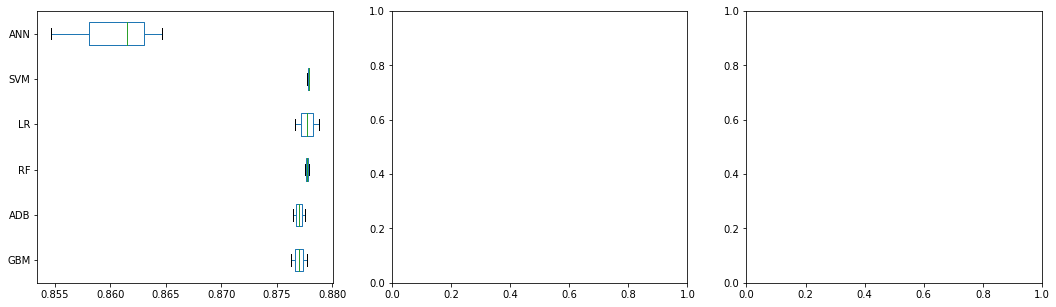

/Users/mghosh2/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:318: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  ax.figure.draw(ax.figure.canvas.get_renderer())


(0.0, 2.0, 2.0, 0.0)

/Users/mghosh2/.local/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/mghosh2/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


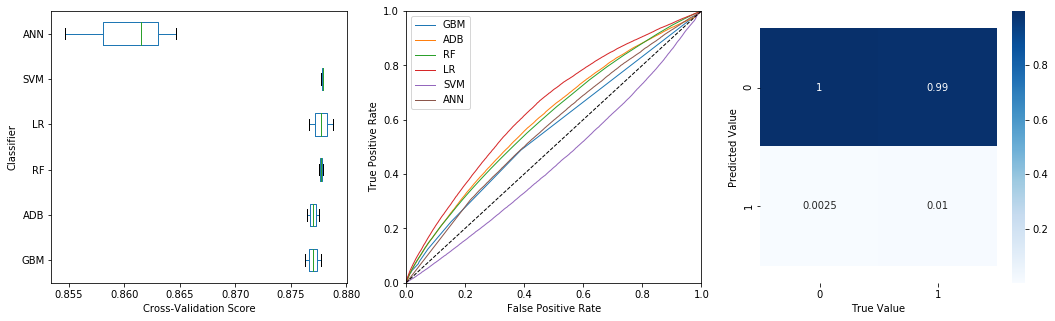

In [79]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

ax = pd.DataFrame(unbalset).boxplot( grid=False, vert=False, ax=axes[0])
ax.set_ylabel('Classifier')
ax.set_xlabel('Cross-Validation Score')

for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)

predict = clf_new['LR'].predict(X_test[cat_imp_feature+num_imp_feature])

cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2]);
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

Text(0, 0.5, 'True Positive & False Positive Rates')

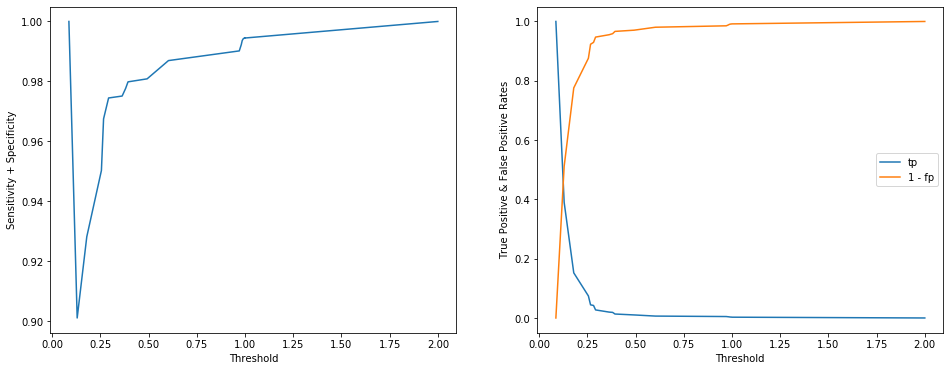

In [89]:

fp, tp, threshold = tp_unbalset[0], fp_unbalset[0] ,threshold_unbalset[0] #getting false and true positive from test set
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# for fp, tp, threshold,model_name in zip(tp_unbalset, fp_unbalset ,threshold_unbalset,['GBM','ADB','RF','LR','SVM','ANN']):
ax[0].plot(threshold, tp + (1 - fp))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Sensitivity + Specificity')

ax[1].plot(threshold, tp, label="tp")
ax[1].plot(threshold, 1 - fp, label="1 - fp")
ax[1].legend()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('True Positive & False Positive Rates')

Text(0, 0.5, 'True Positive & False Positive Rates')

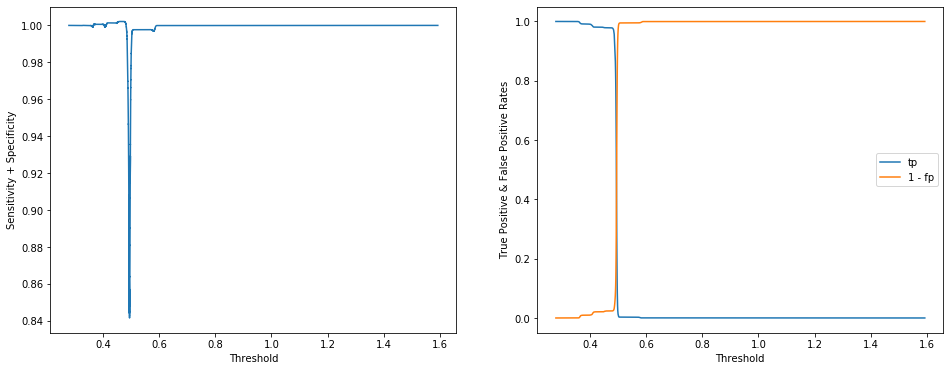

In [88]:

fp, tp, threshold = tp_unbalset[1], fp_unbalset[1] ,threshold_unbalset[1] #getting false and true positive from test set
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# for fp, tp, threshold,model_name in zip(tp_unbalset, fp_unbalset ,threshold_unbalset,['GBM','ADB','RF','LR','SVM','ANN']):
ax[0].plot(threshold, tp + (1 - fp))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Sensitivity + Specificity')

ax[1].plot(threshold, tp, label="tp")
ax[1].plot(threshold, 1 - fp, label="1 - fp")
ax[1].legend()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('True Positive & False Positive Rates')

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


models = {'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
          'ADB': AdaBoostClassifier(n_estimators=100, random_state=0),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=0.5,penalty='l2',solver='lbfgs'),
          'SVM': SVC(gamma='auto',probability=True),
          'ANN' : MLPClassifier(solver='lbfgs', alpha=1e-5,
                                hidden_layer_sizes=(21,8,2), random_state=1)}

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

unbalset = {}
clf_new = {}
for i in models.keys():
    if i=='ANN' :
        test_sizex=0.7
    elif i=='LR':
        test_sizex=0.6
    else:
        test_sizex=0.8
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95)
    
    clf_new[i] = Pipeline(steps=[('preprocessor', preprocessor),
                              ('to_dense', DenseTransformer()),
                      ('classifier', models[i])])
    scores = cross_val_score(clf_new[i], X_train[cat_imp_feature+num_imp_feature],
                                    y_train, cv=3)
    unbalset[i] = scores
    print(i, scores, np.mean(scores))

GBM [0.87296898 0.8757156  0.87608495] 0.874923178271419
ADB [0.87758493 0.87793167 0.877747  ] 0.8777545346301304
RF [0.8764771  0.877747   0.87959372] 0.8779392750320176


/Users/mghosh2/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
/Users/mghosh2/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
/Users/mghosh2/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


LR [0.87758493 0.87832349 0.87753971] 0.8778160437853099
SVM [0.87961595 0.87959372 0.87959372] 0.8796011316741931
ANN [0.85210487 0.87940905 0.84192059] 0.8578115047784274
